In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
f_path = './female.wav'
m_path = './male.wav'
inputDim = 512

In [3]:
def zero_crossing(x):
    return len(np.where(np.diff(np.sign(x)))[0]) 

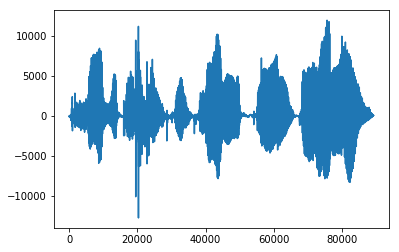

In [4]:
sr,wav = wavfile.read(f_path)

plt.plot(np.arange(0,len(wav)),wav)

In [5]:
zero_crossing(wav)

3332

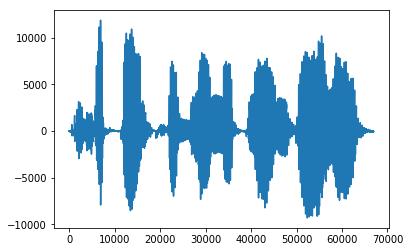

In [6]:
sr,wav = wavfile.read(m_path)

plt.plot(np.arange(0,len(wav)),wav)

In [7]:
zero_crossing(wav)

3042

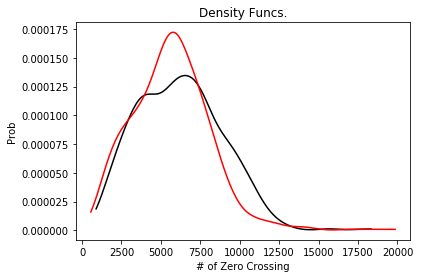

In [11]:
female = list()
male = list()
for dirs, subdirs, files in os.walk('dataset/'):
        for name in files:
            if name.endswith('.wav'):
                _,wav = wavfile.read('dataset/'+name)
                if name.startswith('F'):
                    female.append(zero_crossing(wav))
                elif name.startswith('M'):
                    male.append(zero_crossing(wav))


f_mean = np.mean(female)
m_mean = np.mean(male)

f_std = np.std(female)
m_std = np.std(male)

f_min = np.min(female)
f_max = np.max(female)

m_min = np.min(male)
m_max = np.max(male)

pdf_f = stats.gaussian_kde(female)
pdf_m = stats.gaussian_kde(male)

plt.figure()
plt.title('Density Funcs.')
plt.xlabel('# of Zero Crossing')
plt.ylabel('Prob')

freq = np.linspace(f_min, f_max, num=200)
plt.plot(freq, pdf_f(freq), 'k-', label="Female PDF")

freq = np.linspace(m_min, m_max, num=200)
plt.plot(freq, pdf_m(freq), 'r-', label="Male PDF")

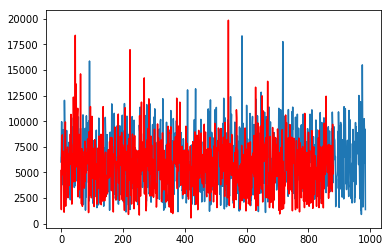

In [10]:
plt.plot(np.arange(0,len(female)),female)
plt.plot(np.arange(0,len(male)),male,c='r')